En este ejemplo queremos resolver la pregunta ¿Podemos predecir el precio de una nueva casa a partir de alguna de sus características?


Para ello se usa el conjunto de datos de vivienda de Boston de Scikit-learn, que proporciona mediciones registradas
de 13 atributos de los mercados de la vivienda de Boston, así como el precio medio de la vivienda.
[Enlace](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/?C=N;O=D)

Una vez cargado el conjunto de datos (506 instancias), la descripción del mismo puede obtenerse fácilmente imprimiendo el campo **DESCR**.
```
print(boston.DESCR)
```

Los las características (x)
y el objetivo (y) se almacenan en otros campos del conjunto de datos:

```
X_boston , y_boston = boston.data , boston.target
```



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
boston = datasets .load_boston()
X_boston , y_boston = boston.data , boston.target
print ("Shape of data:", X_boston.shape , y_boston.shape)
print ("Feature names:",boston.feature_names)
df_boston = pd.DataFrame (boston.data ,columns = boston .feature_names)
df_boston["price"] = boston.target


Shape of data: (506, 13) (506,)
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

En primer lugar, consideramos la tarea de predecir el valor medio de la vivienda en el área de Boston utilizando como variable uno de los atributos, por ejemplo, *LSTAT*, definido como la *"proporción de  personas de estatus más bajo en la población"*.

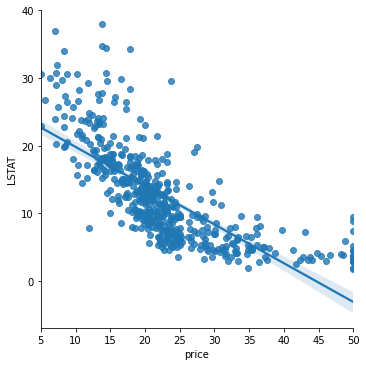

In [ ]:
sns.lmplot(data = df_boston, x = "price", y = "LSTAT",  order = 1)

Se puede observar ver claramente que la relación entre el precio y LSTAT es no lineal, ya que la línea recta ofrece un ajuste pobre.

Se puede probar fácilmente si se puede obtener un mejor ajuste
puede obtenerse incluyendo términos de orden superior. Por ejemplo, un modelo cuadrático ($order = 2$):

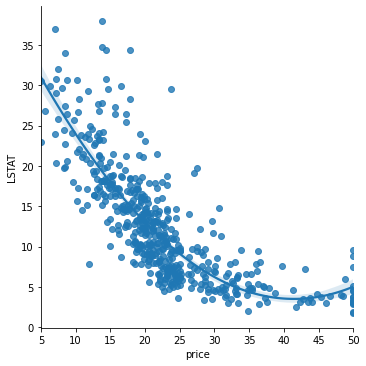

In [ ]:
sns.lmplot(data = df_boston, x = "price", y = "LSTAT",  order = 2)

Podemos estudiar la relación entre varias variables de un conjunto de datos mediante
utilizando las funciones **corr** y **heatmap** que permiten calcular una matriz de correlación
para un conjunto de datos y dibujar un mapa de calor con los valores de correlación.

El mapa de calor
es una imagen matricial que ayuda a interpretar las correlaciones entre las variables.

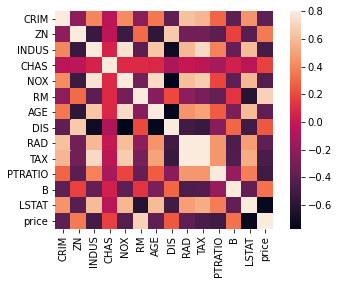

In [ ]:
corrmat = df_boston.corr()
sns.heatmap( corrmat , vmax = .8, square = True)

Podemos seleccionar aquellas variables más correlacionadas con el precio o las que consideremos más interesantes.

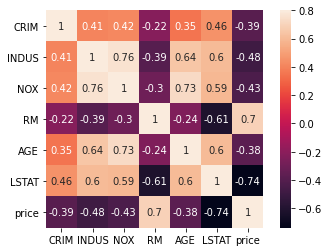

In [ ]:
df_boston_red = df_boston[["CRIM", "INDUS", "NOX", "RM", "AGE", "LSTAT", "price"]]
corrmat_red = df_boston_red.corr()
sns.heatmap( corrmat_red , vmax = .8, square = True, annot=True)

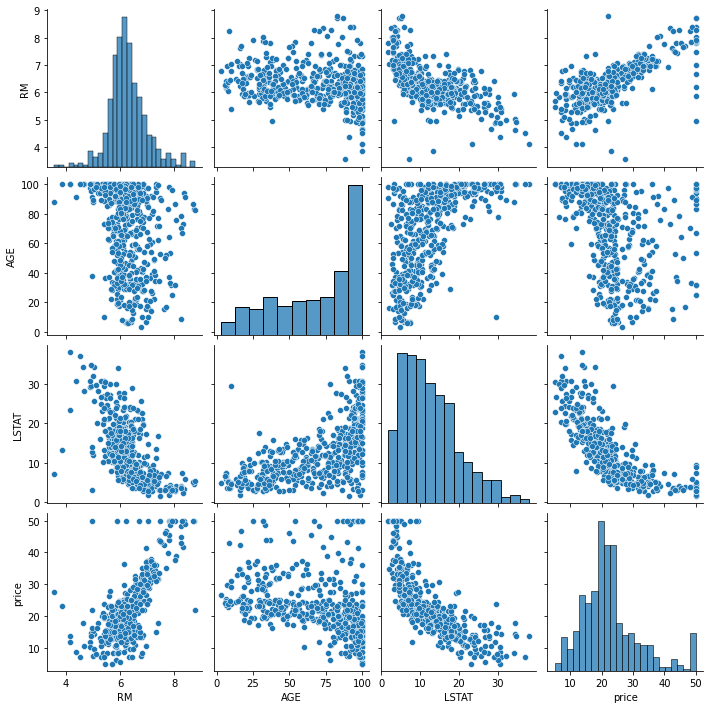

In [ ]:
#sns.pairplot(df_boston_red)
sns.pairplot(df_boston_red[["RM", "AGE", "LSTAT", "price"]])

Para evaluar el poder de predicción del modelo con nuevas muestras:

1. dividimos en conjunto de entrenamiento y test.



In [ ]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston [:train_size]
X_test = X_boston [train_size:]
y_train = y_boston [:train_size]
y_test = y_boston [train_size:]
print ("Training and testing set sizes",X_train.shape , X_test.shape)

Training and testing set sizes (253, 13) (253, 13)


2. calculamos los coeficientes de la regresión lineal

In [ ]:
from sklearn. linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print ("Coeff and intercept:", regr.coef_ , regr.intercept_)


Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582945021


3. ejecutamos la predicción sobre los datos de test

In [ ]:
y_pred = regr.predict(X_test)


4. evaluamos el modelo mediante el uso del coeficiente $R^2$. También podemos calcular también el **MSE**.

In [ ]:
from sklearn import metrics
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))
print ("var:", y_pred.var(), y_test.var())

MSE: 303.43686292658987
R^2: -0.8045486504759589
var: 168.15111238289796 93.28670311987378


Podemos ver que todos los coeficientes obtenidos son diferentes de cero, lo que significa que no se descarta ninguna variable.

A continuación, intentamos construir un modelo disperso para predecir el precio utilizando los factores más importantes y descartando los no informativos. Para ello
podemos crear un regresor **Lasso**, forzando los coeficientes cero.

In [ ]:
from sklearn. linear_model import Lasso
regr_lasso = linear_model.Lasso(alpha = .3)
regr_lasso.fit( X_train , y_train)
y_pred = regr_lasso.predict(X_test)
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))
print ("var:", y_pred.var(), y_test.var())

MSE: 46.53816809487564
R^2: 0.4800186057158011
var: 89.49967942399094 93.28670311987378


In [ ]:
print ("Coeff and intercept:", regr_lasso.coef_ , regr_lasso.intercept_)

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.18324183614838


De aquí podemos obtener una serie de variables y su relativa contribución a la predicción.

In [ ]:
import numpy as np
ind = np.argsort(np. abs(regr_lasso.coef_))
print ("(Ordered variable ( from less to more important):)")
print (boston. feature_names[ind])

(Ordered variable ( from less to more important):)
['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


Para evaluar la predicción, podría ser interesante visualizar las respuestas objetivo
y las respuestas predichas en un gráfico de dispersión, como se hace en el siguiente código:

Text(0, 0.5, 'Predicted price ($1000s)')

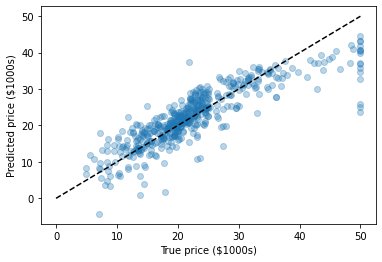

In [ ]:
clf = LinearRegression()
clf.fit(boston.data , boston.target)
predicted = clf. predict(boston. data)

import matplotlib.pyplot as plt

plt.scatter(boston. target , predicted , alpha = 0.3)
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")

También hay otras estrategias para la selección de características. Por ejemplo, podemos seleccionar
las $k=5$ mejores características, según las $k$ puntuaciones más altas, utilizando la función
$SelectKBest$ de Scikit-learn:

In [ ]:
import sklearn. feature_selection as fs
selector = fs.SelectKBest( score_func = fs.f_regression , k = 5)
X_best = selector.fit_transform( X_train , y_train)
selector.fit( X_train , y_train)
print ("Selected features:",zip(selector.get_support() , boston.feature_names))

Selected features: <zip object at 0x7fe747e71c08>


In [ ]:
boston.feature_names[selector.get_support(indices=True)].tolist()

['INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']